In [1]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
data_dir_path = Path.cwd().parent  / "data"

In [6]:
# load seperatly -> very heavy
item_reviews = pd.read_csv(f"{data_dir_path}/item_reviews.csv")

In [7]:
games = pd.read_csv(f"{data_dir_path}/games.csv")
user_reviews = pd.read_csv(f"{data_dir_path}/user_reviews.csv")
train_interaction = pd.read_csv(f"{data_dir_path}/train_interactions.csv")
extended_games = pd.read_csv(f"{data_dir_path}/extended_games.csv")

In [8]:
# Looking for relevant columns for my User and Item Tower

print("games columns")
print(games.columns)
print("user_reviews columns")
print(user_reviews.columns)
print("train interactions columns")
print(train_interaction.columns)
print("extended games columns")
print(extended_games.columns)

games columns
Index(['item_id', 'item_name', 'publisher', 'genres', 'url', 'tags',
       'sentiment', 'metascore', 'specs', 'price', 'release_date'],
      dtype='object')
user_reviews columns
Index(['user_id', 'item_id', 'funny', 'posted', 'last_edited', 'helpful',
       'recommend', 'review'],
      dtype='object')
train interactions columns
Index(['user_id', 'item_id', 'item_name', 'playtime'], dtype='object')
extended games columns
Index(['item_id', 'item_name', 'release_date', 'required_age', 'price',
       'dlc_count', 'detailed_description', 'about_the_game',
       'short_description', 'reviews',
       ...
       'tags_Shop Keeper', 'tags_Coding', 'tags_Football (Soccer)',
       'tags_Hobby Sim', 'tags_Tile-Matching', 'tags_Mahjong', 'tags_Birds',
       'tags_Football (American)', 'tags_Fox', 'tags_Extraction Shooter'],
      dtype='object', length=490)


In [ ]:
print(games.describe().T)
print(games.info())

           item_id    metascore
count  8523.000000  2117.000000
mean   4261.000000    71.982050
std    2460.522505    10.973101
min       0.000000    20.000000
25%    2130.500000    66.000000
50%    4261.000000    73.000000
75%    6391.500000    80.000000
max    8522.000000    96.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       8523 non-null   int64  
 1   item_name     8523 non-null   object 
 2   publisher     8004 non-null   object 
 3   genres        8104 non-null   object 
 4   url           8523 non-null   object 
 5   tags          8519 non-null   object 
 6   sentiment     8492 non-null   object 
 7   metascore     2117 non-null   float64
 8   specs         8386 non-null   object 
 9   price         8373 non-null   object 
 10  release_date  8188 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory

In [15]:
num_cols = games.select_dtypes(include=['int64', 'float64']).columns

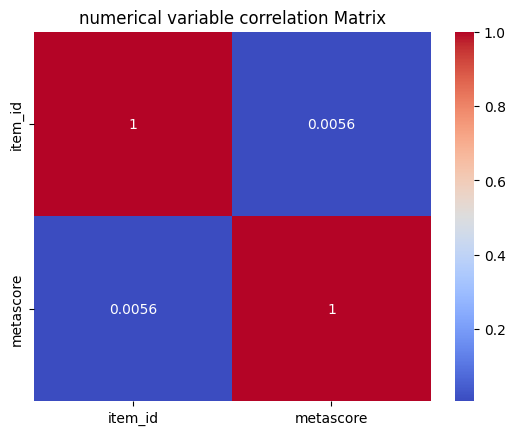

In [16]:
corr = games[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("numerical variable correlation Matrix")
plt.show()